In [74]:
#Inmport necessary libraries
# Supressing the warnings
import warnings
warnings.filterwarnings('ignore')
# Dataframe libraries
import numpy as np
import pandas as pd
# Visulisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Read dataset
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Checking for null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#Above analysis shows that there are no null values
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
bike.rename(columns = {'yr':'year', 'mnth':'months', 'hum':'humidity', 'cnt':'count'}, inplace= 'True')
bike.head()

,instant,dteday,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# Check for duplicates
bike_dup = bike

In [12]:
bike_dup.drop_duplicates(subset = None, inplace = None)
bike_dup.shape

(730, 16)

In [ ]:
#Above analysis shows that there are no duplicate values

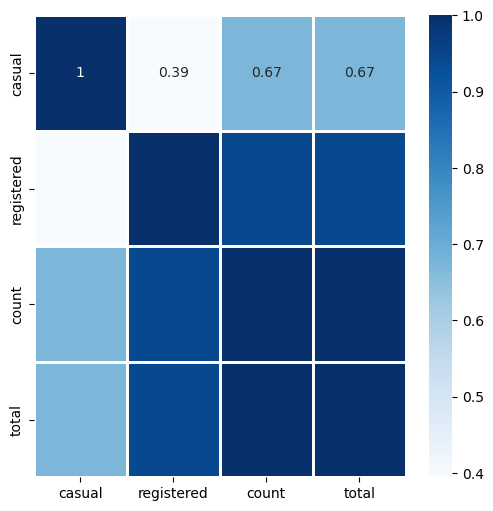

In [13]:
# Removing redundant columns
bike_cnt = bike[['casual', 'registered', 'count']]
bike_cnt['total'] = bike_cnt['casual'] + bike_cnt['registered']
plt.figure(figsize = (6,6))
ax = sns.heatmap(bike_cnt.corr(), annot = True, cmap='Blues', linewidth = 1)
plt.show()

In [14]:
# Dropping the redundant columns
bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
bike.shape

(730, 12)

In [16]:
#Converting season, month, weathersit and weekday to categorical columns
# Season
bike.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace = True)


In [18]:
# Months
bike.months.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)


In [19]:
# Weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

In [20]:
# Weekday
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

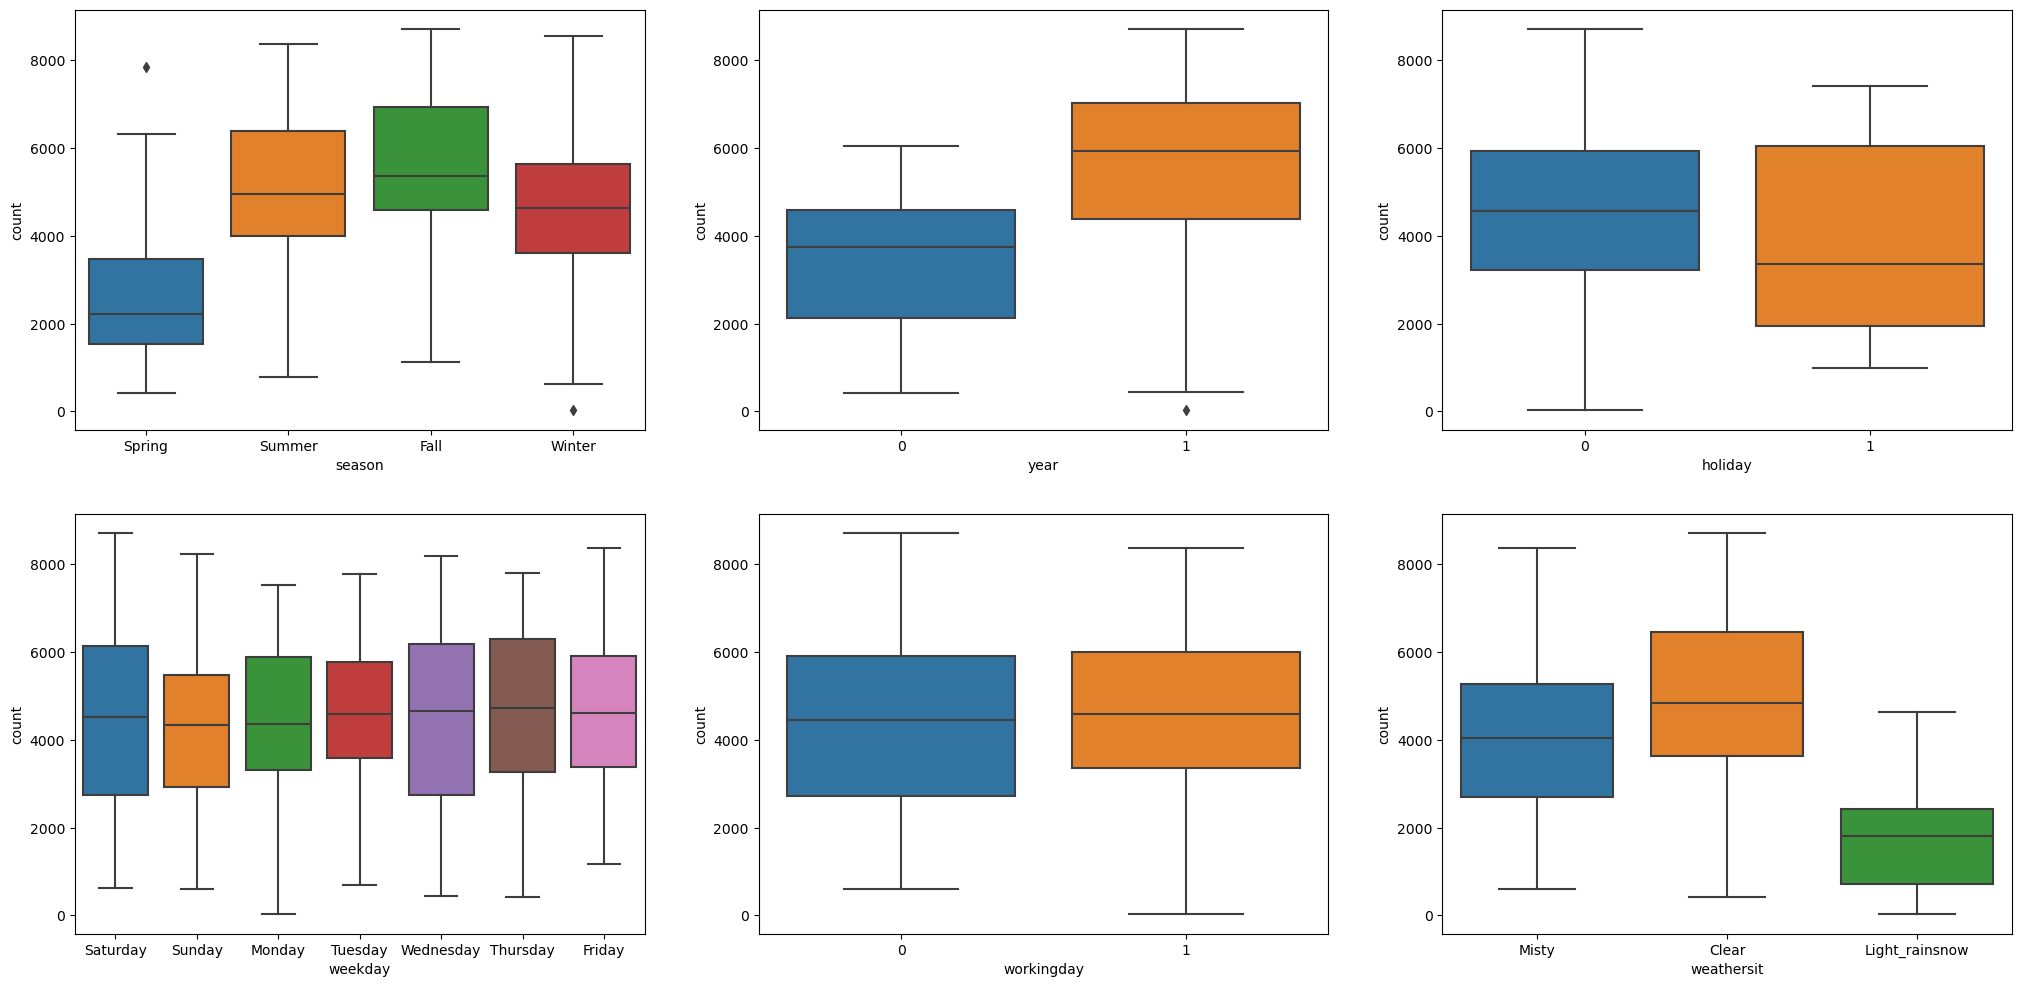

In [22]:
#Analyzing categorical variables
def boxplot_var(var,target):
    plt.figure(figsize=(25, 12))
    for i in range(0,len(var)):
        plt.subplot(2,3,i+1)
        sns.boxplot(x = var[i], y = target, data = bike)
    plt.show()

var =['season','year','holiday','weekday','workingday','weathersit']
boxplot_var(var,'count')

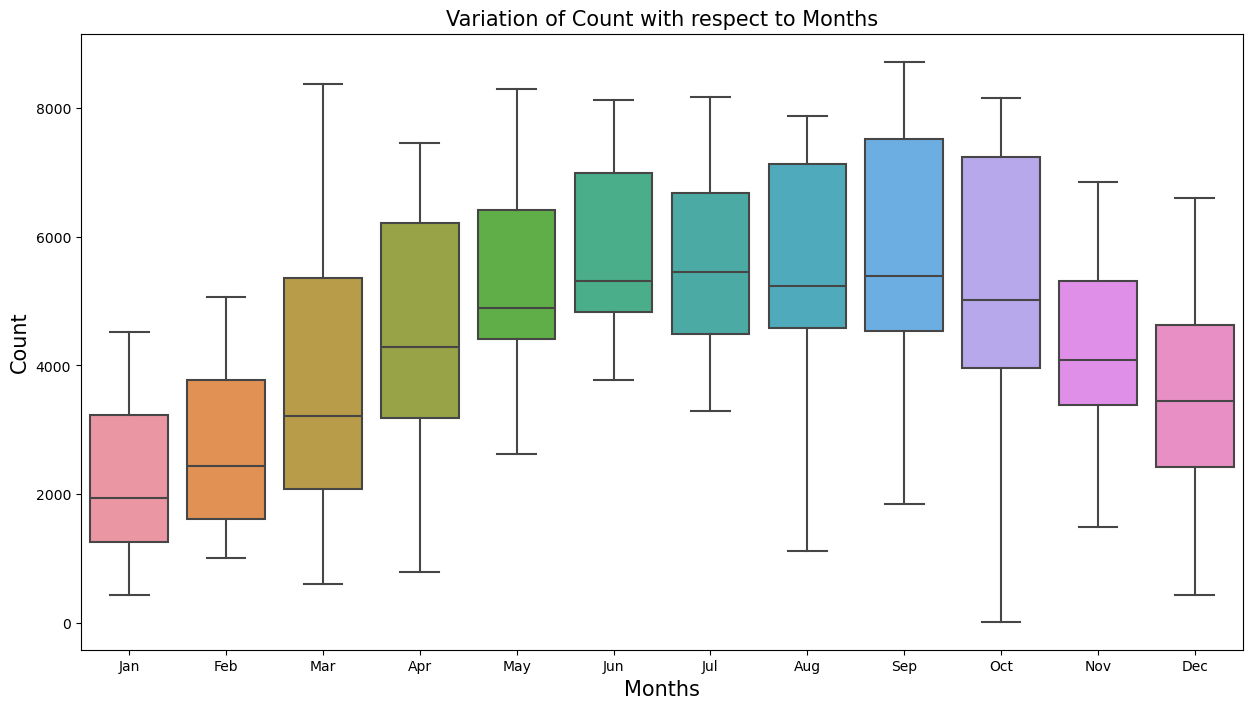

In [23]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'months', y = 'count', data = bike).set_title('Variation of Count with respect to Months', fontsize = 15)
plt.xlabel("Months", fontsize = 15) 
plt.ylabel("Count", fontsize = 15) 
plt.show()

In [35]:
# Functions to generate plots for categorical variables
def barplots(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(x=col, y='count', data=bike)
    plt.subplot(1,2,2)
    sns.barplot(x=col, y='count', data= bike)
    plt.legend(labels=['2018', '2019'])
    return

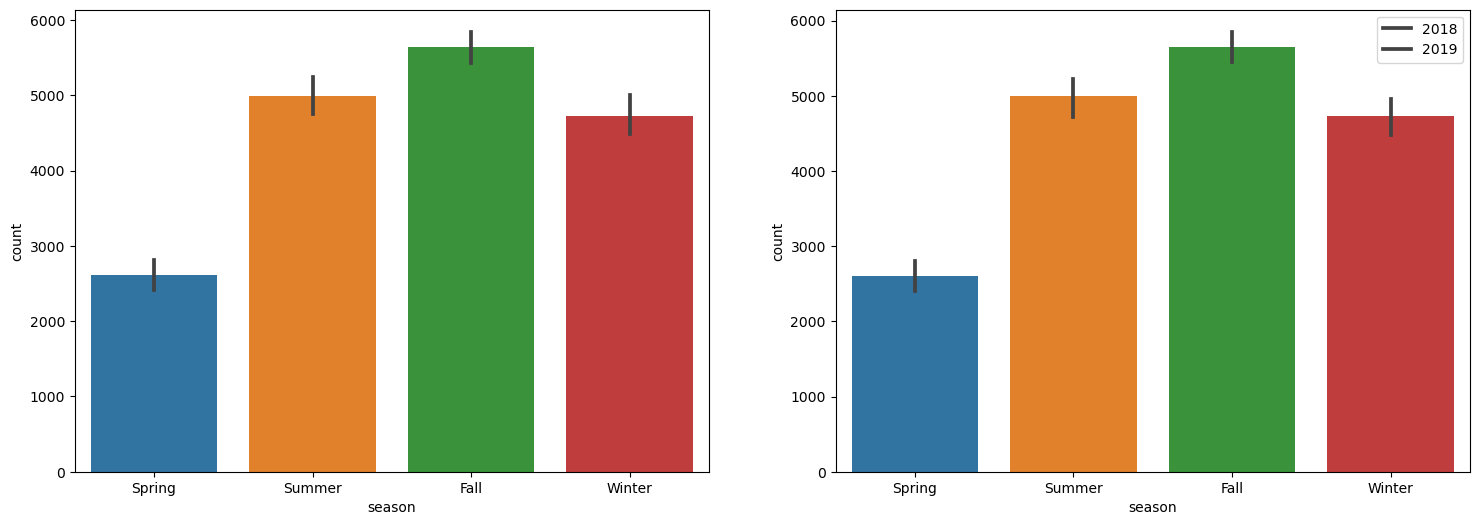

In [36]:
barplots('season', 18,6)

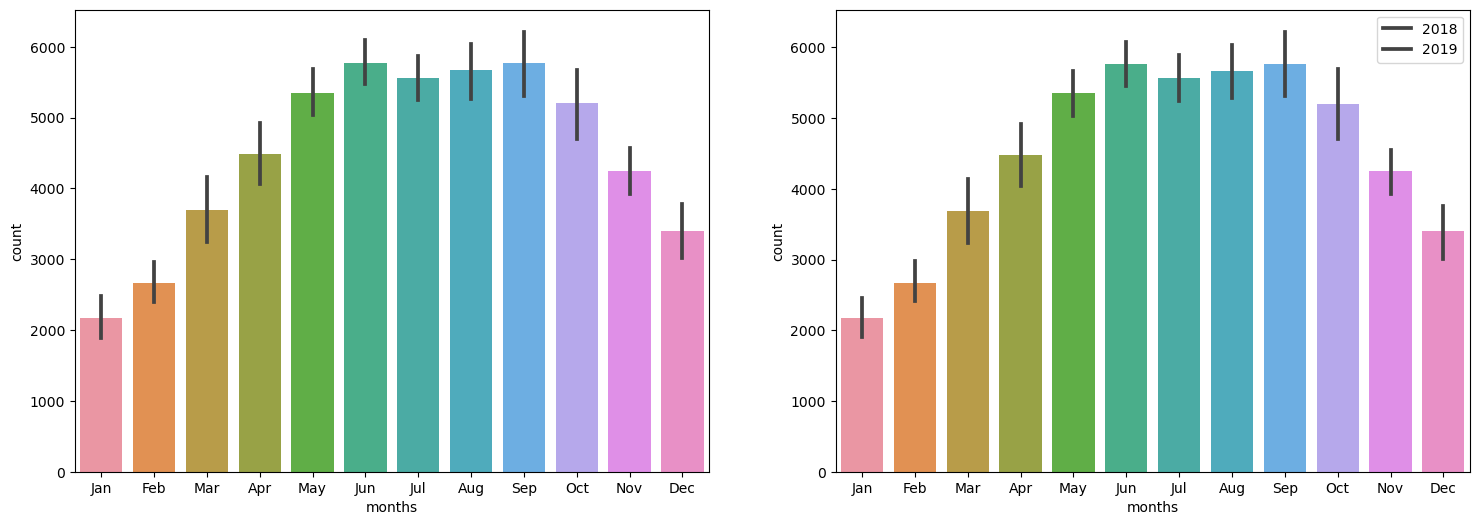

In [37]:
barplots('months', 18,6)

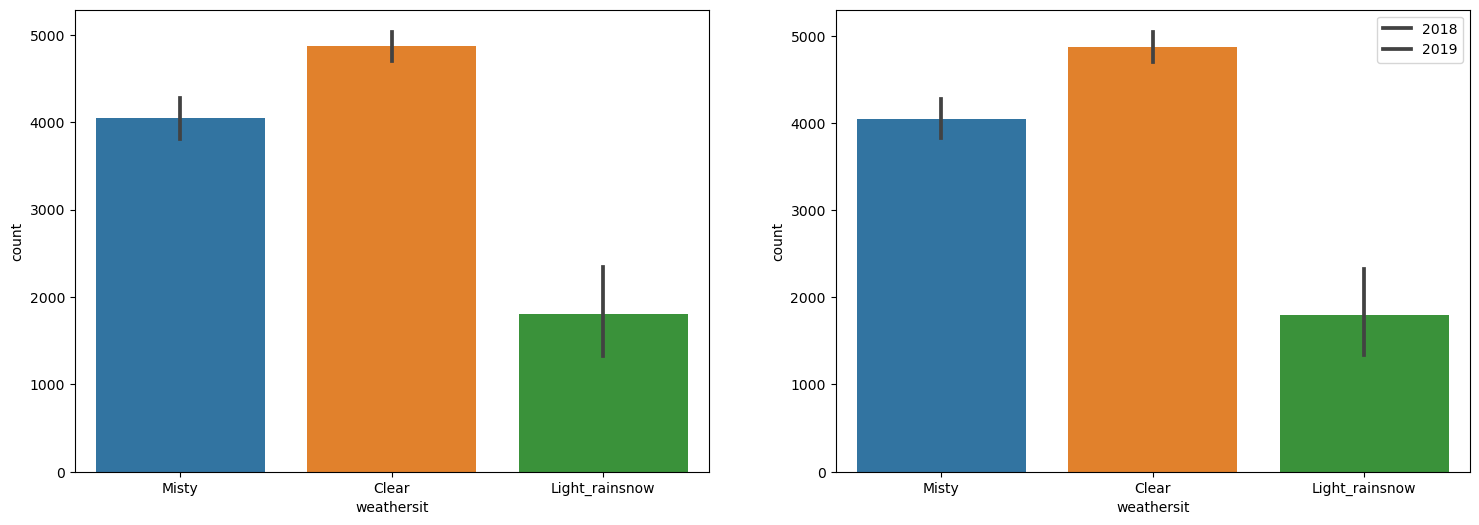

In [38]:
barplots('weathersit', 18,6)

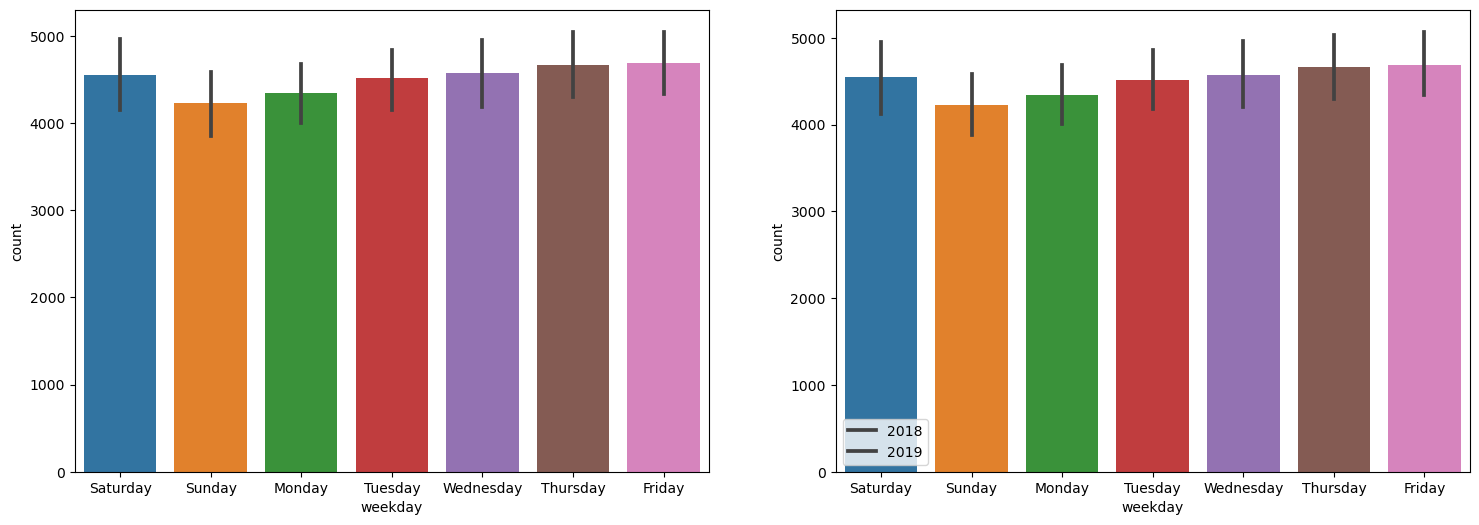

In [39]:
barplots('weekday', 18,6)

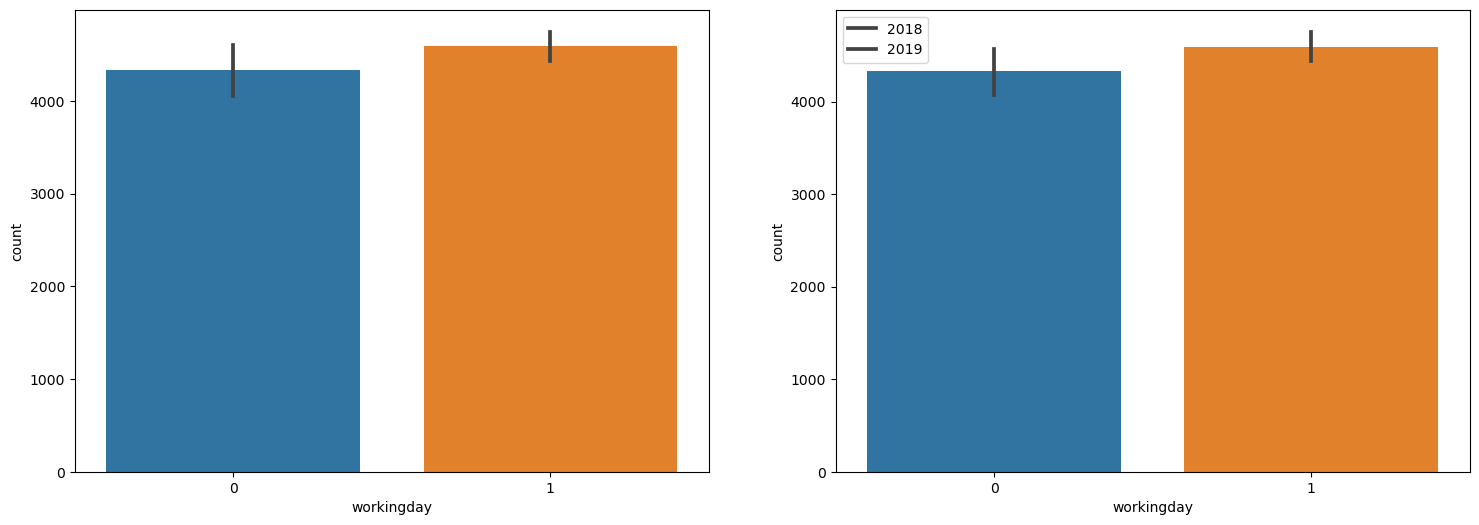

In [40]:
barplots('workingday', 18,6)

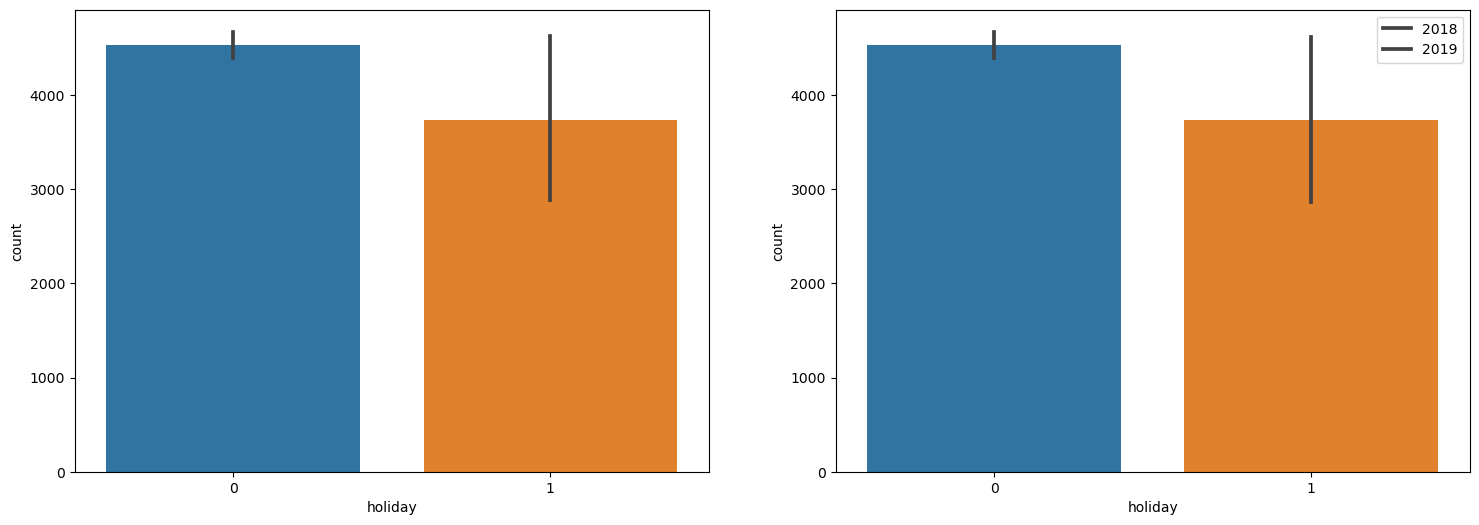

In [41]:
barplots('holiday', 18,6)

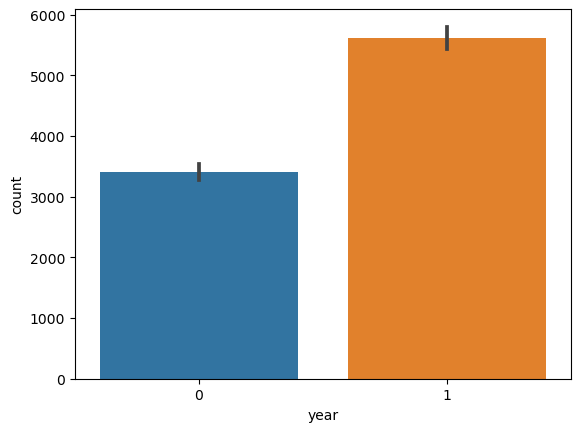

In [43]:
sns.barplot(x='year', y='count', data= bike)
plt.show()

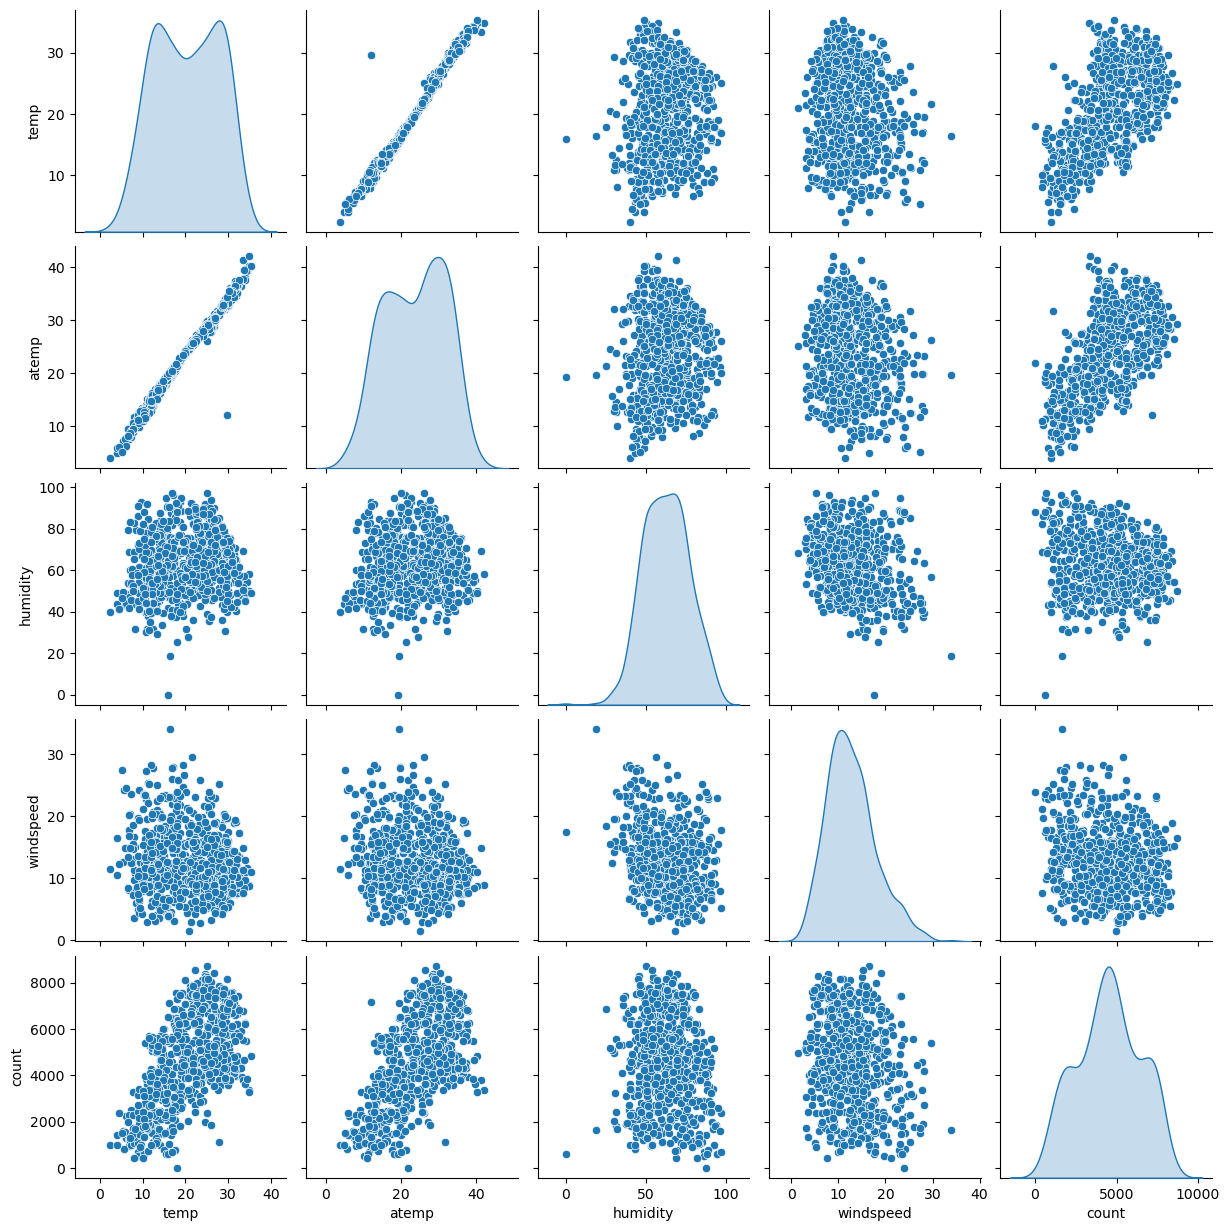

In [44]:
#Numerical Variable analysis
bike_num = bike[['temp','atemp','humidity','windspeed','count']]
sns.pairplot(bike_num,diag_kind='kde')
plt.show()

<Axes: >

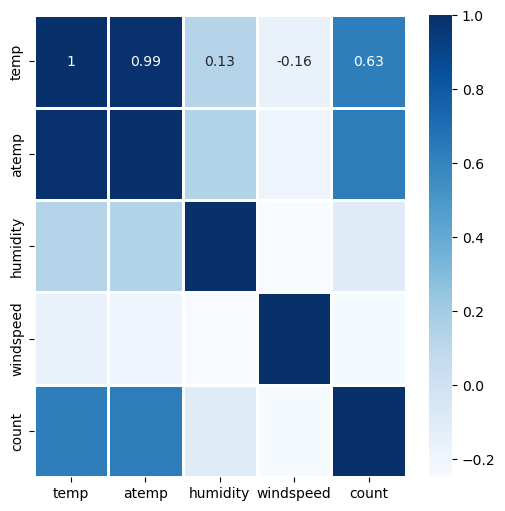

In [45]:
#Above analysis shows that there is a Linear relation between 'temp','atemp' and 'count'
plt.figure(figsize = (6,6))
sns.heatmap(bike_num.corr(), cmap='Blues', annot=True, linewidth=1)

<Figure size 4000x600 with 0 Axes>

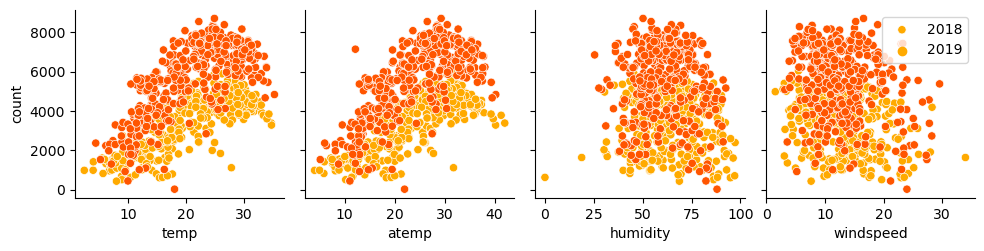

In [46]:
# Checking the impact of year against the numerical variable : 
plt.figure(figsize = (40,6))
ax = sns.pairplot(x_vars=['temp', 'atemp', 'humidity', 'windspeed'], y_vars=['count'] , data=bike, hue='year', palette='autumn_r')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

In [47]:
#Preparation of Data
#Creating dummy variables
months=pd.get_dummies(bike.months,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

In [48]:
# Merging the dataframe
bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,False,False,False,True,False,False,False,False,False,False,...,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,False,False,False,True,False,False,False,False,False,False,...,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,False,False,False,True,False,False,False,False,False,False,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,False,False,False,True,False,False,False,False,False,False,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,False,False,False,True,False,False,False,False,False,False,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [49]:
# Dropping the unwanted columns
bike.drop(['months', 'weekday', 'weathersit', 'season'], axis = 1, inplace = True)

In [50]:
bike.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,False,False,False,True,False,False,False,False,False,False,...,False,False,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,False,False,False,True,False,False,False,False,False,False,...,False,False,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,False,False,False,True,False,False,False,False,False,False,...,False,False,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,False,False,False,True,False,False,False,False,False,False,...,False,False,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,False,False,False,True,False,False,False,False,False,False,...,False,False,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [51]:
bike.shape

(730, 30)

In [52]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Aug             730 non-null    bool   
 1   Dec             730 non-null    bool   
 2   Feb             730 non-null    bool   
 3   Jan             730 non-null    bool   
 4   Jul             730 non-null    bool   
 5   Jun             730 non-null    bool   
 6   Mar             730 non-null    bool   
 7   May             730 non-null    bool   
 8   Nov             730 non-null    bool   
 9   Oct             730 non-null    bool   
 10  Sep             730 non-null    bool   
 11  Monday          730 non-null    bool   
 12  Saturday        730 non-null    bool   
 13  Sunday          730 non-null    bool   
 14  Thursday        730 non-null    bool   
 15  Tuesday         730 non-null    bool   
 16  Wednesday       730 non-null    bool   
 17  Light_rainsnow  730 non-null    boo

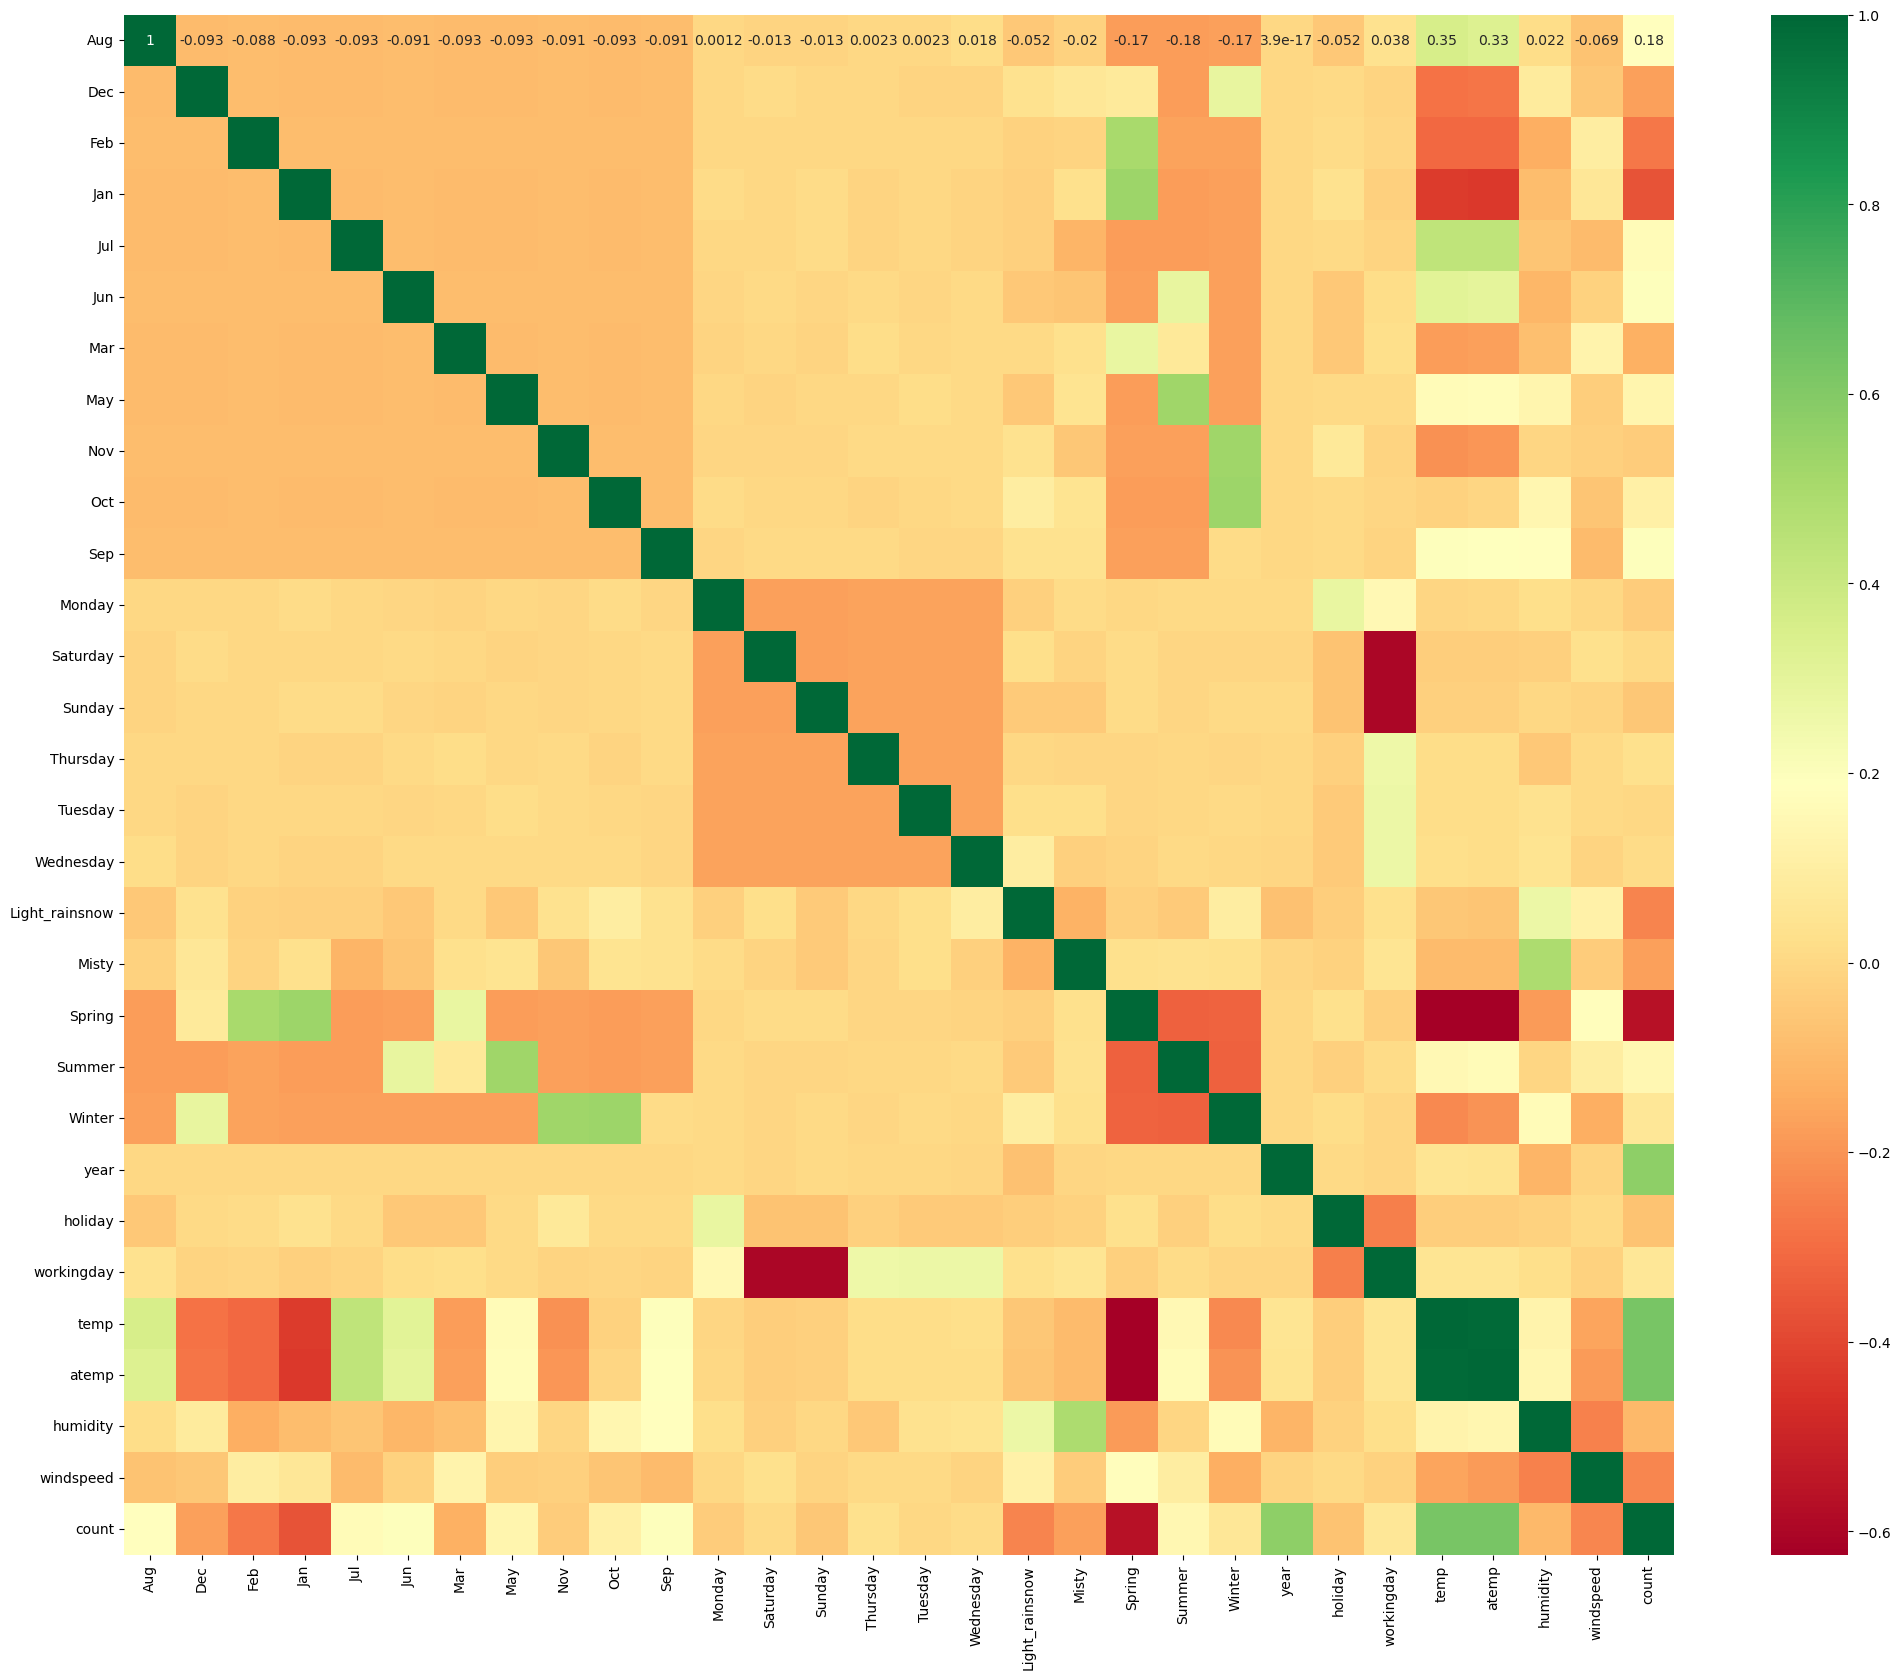

In [53]:
#Correlation analysis
plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='RdYlGn', annot = True)
plt.show()

In [ ]:
#From above analysis we can observe multi-colinearity between the variables.
#We will use either temp or atemp as there is high multicolinearity amongst the two.
#temp, atemp and year has a strong correlation with count.
#Spring is negatively correlated with count.
##Months and corresponding weathers are co-related as expecetd

In [54]:
#Splitting data to train and test
from sklearn.model_selection import train_test_split
bike_train, bike_test = train_test_split(bike,train_size = 0.7, random_state=100)

In [55]:
bike_train.shape

(510, 30)

In [56]:
bike_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255
std,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000
50%,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000


In [57]:
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


In [ ]:
#Rescaling the data
#We will be use MinMaxScaler for scaling the dataframe

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [59]:
bike_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
576,False,False,False,False,True,False,False,False,False,False,...,False,False,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,False,False,False,False,False,False,True,False,False,False,...,False,False,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,False,True,False,False,False,False,False,False,False,False,...,False,False,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,False,False,False,False,False,False,False,False,False,False,...,True,False,1,0,0,15.443347,18.8752,48.9583,8.708325,4220
111,False,False,False,False,False,False,False,False,False,False,...,True,False,0,0,1,13.803347,16.0977,72.9583,14.707907,1683


In [60]:
# Appliyng scaler on numerical vars
num_vars = ['temp','humidity','windspeed','count']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [61]:
bike_train[num_vars].head()

,temp,humidity,windspeed,count
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


In [62]:
bike_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
576,False,False,False,False,True,False,False,False,False,False,...,False,False,1,0,1,0.815169,33.1448,0.725633,0.264686,0.827658
426,False,False,False,False,False,False,True,False,False,False,...,False,False,1,0,0,0.442393,20.6746,0.640189,0.255342,0.465255
728,False,True,False,False,False,False,False,False,False,False,...,False,False,1,0,0,0.245101,11.5850,0.498067,0.663106,0.204096
482,False,False,False,False,False,False,False,False,False,False,...,True,False,1,0,0,0.395666,18.8752,0.504508,0.188475,0.482973
111,False,False,False,False,False,False,False,False,False,False,...,True,False,0,0,1,0.345824,16.0977,0.751824,0.380981,0.191095


In [63]:
#Building Linear model
y_train = bike_train.pop('count')
X_train = bike_train

In [64]:
X_train

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed
576,False,False,False,False,True,False,False,False,False,False,...,False,False,False,1,0,1,0.815169,33.14480,0.725633,0.264686
426,False,False,False,False,False,False,True,False,False,False,...,True,False,False,1,0,0,0.442393,20.67460,0.640189,0.255342
728,False,True,False,False,False,False,False,False,False,False,...,True,False,False,1,0,0,0.245101,11.58500,0.498067,0.663106
482,False,False,False,False,False,False,False,False,False,False,...,False,True,False,1,0,0,0.395666,18.87520,0.504508,0.188475
111,False,False,False,False,False,False,False,False,False,False,...,False,True,False,0,0,1,0.345824,16.09770,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,True,False,False,False,False,False,False,False,False,False,...,False,False,False,1,0,1,0.863973,35.35440,0.679690,0.187140
53,False,False,True,False,False,False,False,False,False,False,...,True,False,False,0,0,1,0.202618,12.28585,0.435939,0.111379
350,False,True,False,False,False,False,False,False,False,False,...,False,False,True,0,0,0,0.248216,12.46855,0.577930,0.431816
79,False,False,False,False,False,False,True,False,False,False,...,False,True,False,0,0,1,0.462664,20.48675,0.759870,0.529881


In [65]:
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: count, Length: 510, dtype: float64

In [66]:
#We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [68]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm,n_features_to_select=20)
rfe =rfe.fit(X_train, y_train)

In [69]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 8),
 ('Mar', False, 9),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('Monday', False, 3),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 5),
 ('Tuesday', False, 4),
 ('Wednesday', False, 6),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [72]:
#Columns where RFE support is True
X_train.columns[rfe.support_]

Index(['Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Sep', 'Saturday', 'Sunday',
       'Light_rainsnow', 'Misty', 'Spring', 'Summer', 'Winter', 'year',
       'holiday', 'workingday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

In [71]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Jun', 'Mar', 'Oct', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday', 'atemp'],
      dtype='object')

In [73]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [75]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [78]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.astype(float).values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
9,Sunday,inf
8,Saturday,inf
16,holiday,inf
17,workingday,inf
12,Spring,5.79
18,temp,4.88
14,Winter,3.88
13,Summer,3.49
3,Jan,2.38
19,humidity,1.97


In [80]:
# Model2
X_train_new = X_train_rfe.drop(['Sunday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,97.18
11,Spring,5.79
17,temp,4.88
13,Winter,3.88
12,Summer,3.49
3,Jan,2.38
18,humidity,1.97
16,workingday,1.88
2,Feb,1.87
6,Nov,1.82


In [81]:
#Model2 Add constant
X_train_lm1=sm.add_constant(X_train_rfe)
#Create a first fitted model
lr2=sm.OLS(y_train, X_train_lm1.astype(float)).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          5.20e-189
Time:                        10:41:01   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2475      0.030      8.194      0.000       0.188       0.307
Dec               -0.0488      0.018     -2.692      0.007      -0.084      -0.013
Feb               -0.0348      0.021     -1.626      0.105      -0.077       0.007
Jan               -0.0650      0.021     -3.067      0.002      -0.107      -0.023
Jul               -0.0510      0.018     -2.844      0.005      -0.086      -0.016
May                0.0229      0.017      1.325      0.186      -0.011       0.057
Nov               -0.0461      0.019     -2.456      0.014      -0.083      -0.009
Sep                0.0723      0.017      4.349      0.000       0.040       0.105
Saturday           0.1040      0.012      8.744      0.000       0.081       0.127
Sunday             0.0495      0.012      4.002      0.000       0.025       0.074
Light_rainsnow    -0.2549      0.026     -9.773      0.000      -0.306      -0.204
Misty             -0.0583      0.010     -5.655      0.000      -0.079      -0.038
Spring            -0.0553      0.022     -2.528      0.012      -0.098      -0.012
Summer             0.0295      0.017      1.747      0.081      -0.004       0.063
Winter             0.1001      0.018      5.618      0.000       0.065       0.135
year               0.2318      0.008     29.103      0.000       0.216       0.247
holiday            0.0003      0.022      0.016      0.987      -0.042       0.043
workingday         0.0936      0.010      9.443      0.000       0.074       0.113
temp               0.4527      0.038     11.846      0.000       0.378       0.528
humidity          -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed         -0.1873      0.025     -7.371      0.000      -0.237      -0.137
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                     9.23e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.79e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [83]:
#Model3
X_train_new = X_train_lm1.drop(['Saturday'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
0,const,94.23
11,Spring,5.79
17,temp,4.88
13,Winter,3.88
12,Summer,3.49
3,Jan,2.38
18,humidity,1.97
2,Feb,1.87
6,Nov,1.82
16,workingday,1.76


In [85]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)
lr1 = sm.OLS(y_train, X_train_lm1.astype(float)).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          5.20e-189
Time:                        10:42:49   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3514      0.038      9.

In [86]:
# Model4
X_train_new = X_train_lm1.drop(['workingday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,89.66
11,Spring,5.79
16,temp,4.88
13,Winter,3.87
12,Summer,3.49
3,Jan,2.38
17,humidity,1.97
2,Feb,1.87
6,Nov,1.82
1,Dec,1.66


In [88]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)
lr1 = sm.OLS(y_train, X_train_lm1.astype(float)).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.2
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          6.33e-190
Time:                        10:43:33   Log-Likelihood:                 524.94
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3436      0.037      9.

In [89]:
# Model5
X_train_new = X_train_lm1.drop(['Feb'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
0,const,86.12
10,Spring,5.39
15,temp,4.56
12,Winter,3.86
11,Summer,3.42
16,humidity,1.96
5,Nov,1.78
2,Jan,1.68
9,Misty,1.58
1,Dec,1.51


In [90]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.2
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          6.33e-190
Time:                        10:44:07   Log-Likelihood:                 524.94
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3436      0.037      9.

In [91]:
# Model6
X_train_new = X_train_lm1.drop(['Nov'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
0,const,81.80
9,Spring,5.20
14,temp,4.25
11,Winter,3.63
10,Summer,3.31
15,humidity,1.96
2,Jan,1.65
8,Misty,1.58
4,May,1.50
3,Jul,1.49


In [93]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)
lr1 = sm.OLS(y_train, X_train_lm1.astype(float)).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.2
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          1.70e-190
Time:                        10:44:53   Log-Likelihood:                 520.93
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -935.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3133      0.035      8.

In [94]:
# Model7
X_train_new = X_train_lm1.drop(['Dec'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
0,const,79.79
8,Spring,5.19
13,temp,3.99
10,Winter,3.63
9,Summer,3.26
14,humidity,1.94
1,Jan,1.57
7,Misty,1.57
3,May,1.50
2,Jul,1.49


In [96]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)
lr1 = sm.OLS(y_train, X_train_lm1.astype(float)).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.1
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          3.76e-191
Time:                        10:45:37   Log-Likelihood:                 519.77
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -939.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3049      0.035      8.

In [97]:
# Model8
X_train_new = X_train_lm1.drop(['Jan'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
0,const,77.26
7,Spring,5.12
12,temp,3.71
9,Winter,3.52
8,Summer,3.23
13,humidity,1.94
6,Misty,1.57
2,May,1.50
1,Jul,1.49
3,Sep,1.30


In [99]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)
lr1 = sm.OLS(y_train, X_train_lm1.astype(float)).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.8
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          1.95e-191
Time:                        10:46:23   Log-Likelihood:                 517.69
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2924      0.035      8.

In [100]:
# Model9
X_train_new = X_train_lm1.drop(['Spring'], axis = 1)
calculateVIF(X_train_new)

,Features,VIF
0,const,45.80
12,humidity,1.92
7,Summer,1.70
11,temp,1.61
6,Misty,1.56
2,May,1.47
1,Jul,1.44
8,Winter,1.29
5,Light_rainsnow,1.25
3,Sep,1.19


In [102]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)
lr1 = sm.OLS(y_train, X_train_lm1.astype(float)).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.4
Date:                Sat, 28 Sep 2024   Prob (F-statistic):          6.52e-191
Time:                        10:47:11   Log-Likelihood:                 513.66
No. Observations:                 510   AIC:                            -999.3
Df Residuals:                     496   BIC:                            -940.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2303      0.027      8.

In [ ]:
#Above analysis shows that there is very low Multicollinearity between the predictors and the p-values for all the predictors seems to be significant
# The model looks good.

In [105]:
lr1.params

const             0.230275
Jul              -0.044547
May               0.010028
Sep               0.095337
Sunday           -0.045222
Light_rainsnow   -0.238597
Misty            -0.053601
Summer            0.078429
Winter            0.136174
year              0.228327
holiday          -0.106002
temp              0.593061
humidity         -0.176803
windspeed        -0.186641
dtype: float64

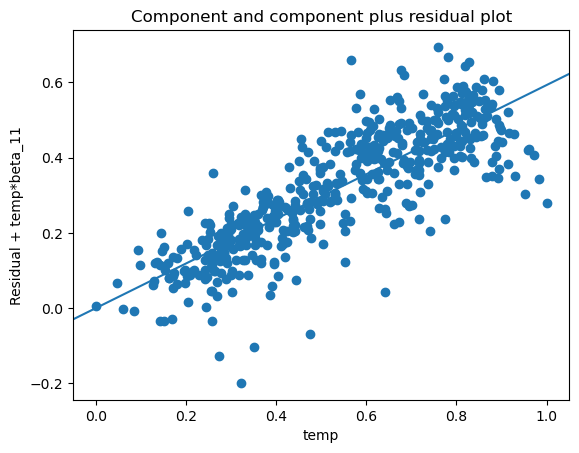

In [106]:
#Model Validation
#Analyzing Linear relationship
sm.graphics.plot_ccpr(lr1, 'temp')
plt.show()

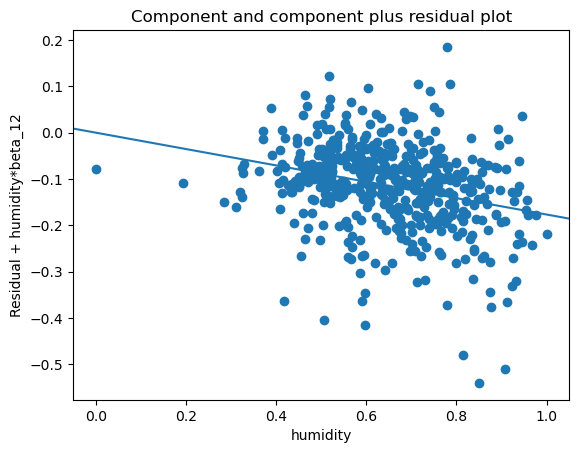

In [107]:
sm.graphics.plot_ccpr(lr1, 'humidity')
plt.show()

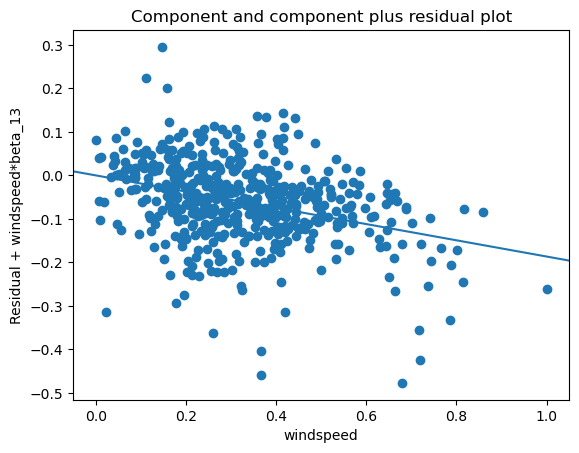

In [108]:
sm.graphics.plot_ccpr(lr1, 'windspeed')
plt.show()

In [ ]:
#The above plots depict the relationship between the model and the different predictor variables. We can clearly see that the linearity is well preserved

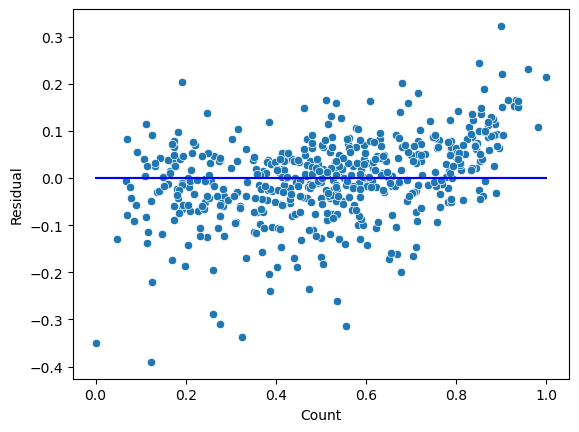

In [111]:
#Homoscedasticity
y_train_pred = lr1.predict(X_train_lm1)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-b')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [ ]:
#As per above graph it wshows that there is no such visible pattern observed in residual values, thus we can conclude homoscedacity is well preserved

In [112]:
#Multicolinearity
X_train_new.columns

Index(['const', 'Jul', 'May', 'Sep', 'Sunday', 'Light_rainsnow', 'Misty',
       'Summer', 'Winter', 'year', 'holiday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

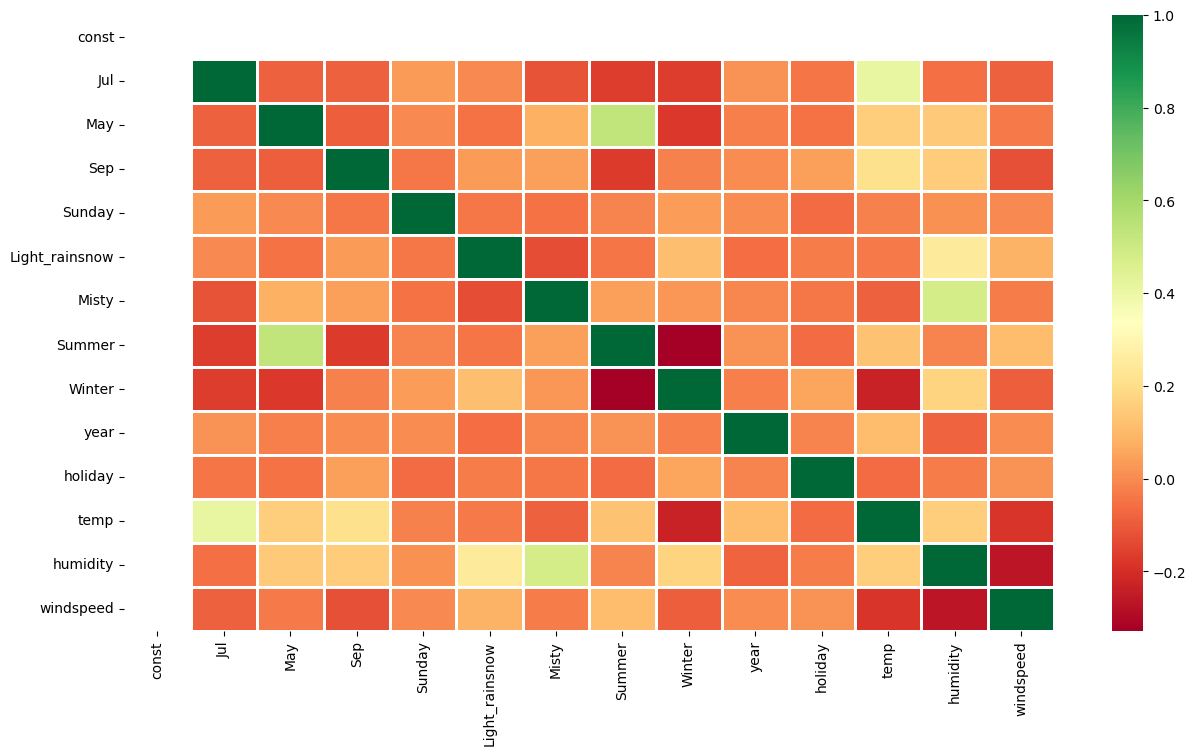

In [113]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [114]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_new)

,Features,VIF
0,const,45.80
12,humidity,1.92
7,Summer,1.70
11,temp,1.61
6,Misty,1.56
2,May,1.47
1,Jul,1.44
8,Winter,1.29
5,Light_rainsnow,1.25
3,Sep,1.19


In [ ]:
#Above result shows the the VIF value is less than 5 for all the predictor varibales.This shows that the multicolinearity is quite insignificant.

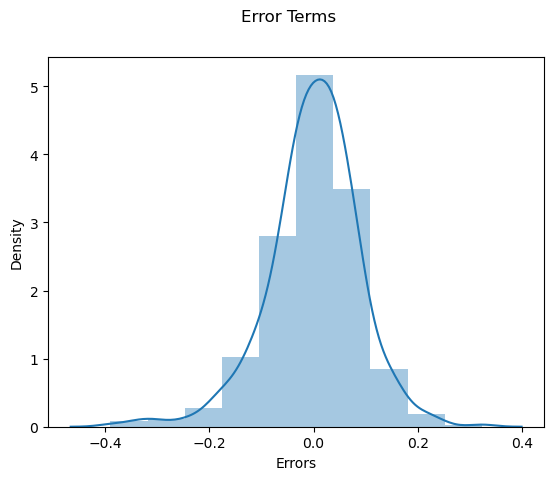

In [115]:
#Normality of error
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 10)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()

In [ ]:
#Error is normally distributed
#Applying scaler.transform() to all numeric variables in test dataset.

In [116]:
num_vars = ['temp', 'humidity', 'windspeed','count']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test[num_vars].head()

,temp,humidity,windspeed,count
184,0.831783,0.657364,0.084219,0.692706
535,0.901354,0.610133,0.153728,0.712034
299,0.511964,0.837699,0.334206,0.303382
221,0.881625,0.437098,0.339570,0.547400
152,0.817246,0.314298,0.537414,0.569029


In [117]:
bike_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,24.250312,0.638221,0.313293,0.522154
std,0.500809,0.187620,0.459303,0.233187,8.281075,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.046591,4.941955,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.355429,17.090025,0.529197,0.198843,0.378595
50%,0.000000,0.000000,1.000000,0.558172,24.700000,0.625590,0.300126,0.524678
75%,1.000000,0.000000,1.000000,0.755981,31.124313,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,0.984424,41.318550,1.002146,0.807474,0.963300


In [118]:
#Dividing X_test and y_test
y_test = bike_test.pop('count')
X_test = bike_test

In [119]:
X_train_lm1 = X_train_lm1.drop(['const'], axis = 1)

In [120]:
col1=X_train_lm1.columns
X_test=X_test[col1]
X_test_lm1 = sm.add_constant(X_test)
X_test_lm1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   Jul             220 non-null    bool   
 2   May             220 non-null    bool   
 3   Sep             220 non-null    bool   
 4   Sunday          220 non-null    bool   
 5   Light_rainsnow  220 non-null    bool   
 6   Misty           220 non-null    bool   
 7   Summer          220 non-null    bool   
 8   Winter          220 non-null    bool   
 9   year            220 non-null    int64  
 10  holiday         220 non-null    int64  
 11  temp            220 non-null    float64
 12  humidity        220 non-null    float64
 13  windspeed       220 non-null    float64
dtypes: bool(8), float64(4), int64(2)
memory usage: 13.8 KB


In [121]:
y_pred = lr1.predict(X_test_lm1)

Text(0, 0.5, 'y_pred')

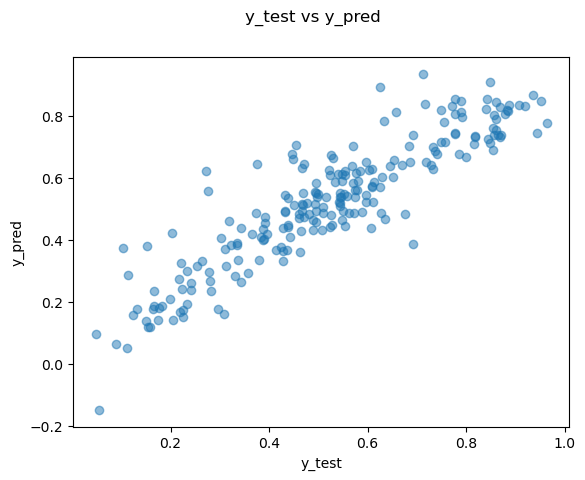

In [122]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')

In [123]:
#Calculate R^2
from sklearn.metrics import r2_score
r2 = round(r2_score(y_test, y_pred),4)
r2

0.807

In [124]:
#Adjusted R^2 
# n is number of rows in test dataset
n = X_test.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]
# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7948

In [ ]:
#The model seems to be good enough for generalized datasets

In [125]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0961

In [126]:
from sklearn.metrics import mean_absolute_error
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0722

In [ ]:
#Based on the model, the variables that are influencing the bike bookings are Temp, Year, weathe, season
#Recommendations to increase sales are Frequent sanitization of bikes, discounts, better deals,Rain covers and umbrellas.